<a href="https://colab.research.google.com/github/gnakspandana/DeepLearning_ImageAnalysis/blob/main/Lab1_imageanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

Run the above code and interpret the results. Please note the output of the model is the
prediction of class labels of each of the four points. If you run the code several times, will you
observe the same results? Why?

Ans: I will not get the same result if I run the code several times because of random initialization for the weights in the neural network.


In [1]:
# Logic Operator
import numpy as np
import matplotlib.pyplot as plt


sigmoid function : σ(x) = 1 / (1 + e^(-x))

*  σ(x) is the output of the sigmoid function.
*  x is the input value.
*  e is the base of the natural logarithm (approximately equal to 2.71828).

In [2]:
# Sigmoid function (activation function)
def sigmoid(x):
  return 1.0/(1+ np.exp(-x))

In [3]:
# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
  return x * (1.0 - x)

Keep the parameter “n_unit=1” and increase the number of iterations starting from 10, 50, 100, 500, 2000, and compare the loss values. What can you conclude from increasing the number of iterations?

weights2 [[0.79589977]]
weights2 [[0.20807814]]
weights2 [[0.47788385]]
weights2 [[0.08654926]]
weights2 [[0.72873598]]
The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[4.47375148e-04]
 [1.83514324e-02]
 [1.83514324e-02]
 [4.98112386e-01]]


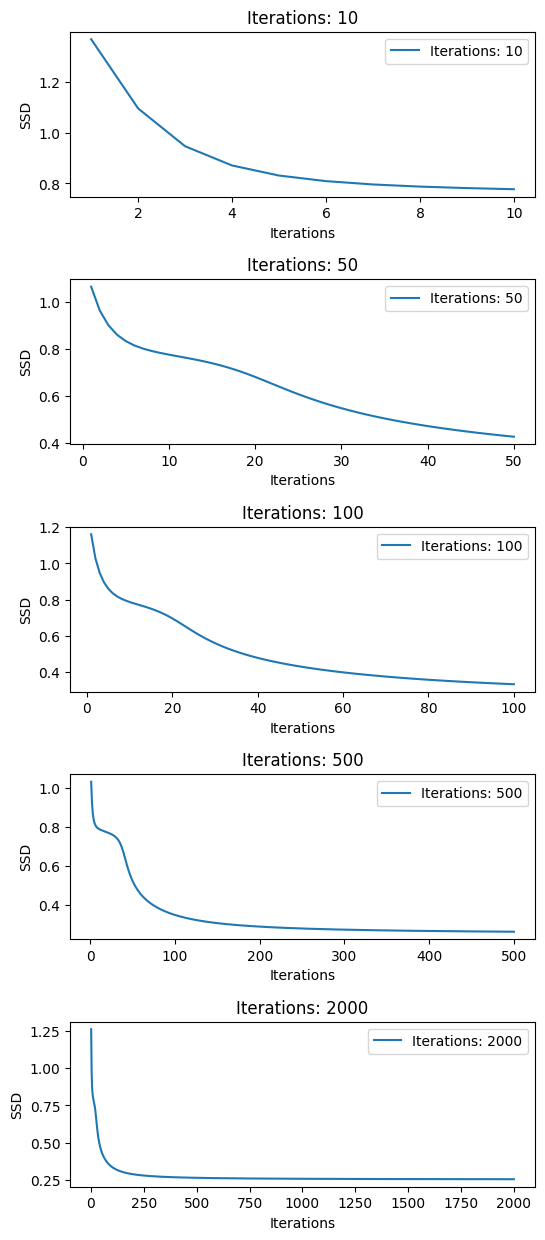

In [4]:
class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    print('weights2',self.weights2 )
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
    self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
  def backprop(self):
# Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations_values = [10,50,100,500,2000]
n_unit = 1
# Create a grid of subplots
fig, axs = plt.subplots(len(iterations_values), 1, figsize=(6, 15))

if __name__ == "__main__":
  for i,iterations in enumerate(iterations_values):
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) #  x inputs are given, x1,x2
    Target = np.array([[0],[0],[0],[1]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for j in range(iterations):
      model.feedforward()
      model.backprop()
      errors = (Target - model.output)**2
      SSD.append(np.sum(errors)) # Objective(loss) function
    Itr = np.linspace(1,len(SSD),len(SSD))
    axs[i].plot(Itr, SSD, label=f"Iterations: {iterations}")
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('SSD')
    axs[i].set_title(f"Iterations: {iterations}")
    axs[i].legend()
print("The target values are:", Target)
print("The predicted values are:", model.output)
plt.subplots_adjust(hspace=0.5)


Now, with a fixed value of “iterations = 1000”, increase the parameter “n_unit” to 2, 5, 10 and interpret the results.

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[9.94890994e-05]
 [1.48953311e-02]
 [1.45190241e-02]
 [9.79876213e-01]]


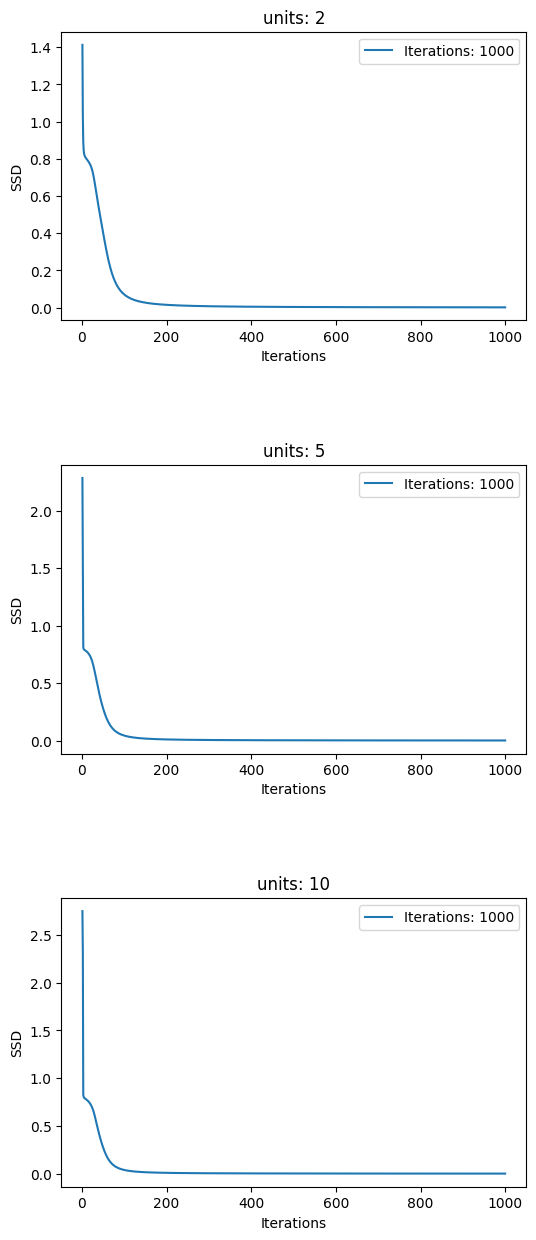

In [5]:
#fixed iteration of 1000
class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
    self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
  def backprop(self):
# Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations = 1000
n_unit_values = [2, 5, 10]
# Create a grid of subplots
fig, axs = plt.subplots(len(n_unit_values), 1, figsize=(6, 15))

if __name__ == "__main__":
  for i,n_unit in enumerate(n_unit_values):
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # x inputs are given, x1,x2
    Target = np.array([[0],[0],[0],[1]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for j in range(iterations):
      model.feedforward()
      model.backprop()
      errors = (Target - model.output)**2
      SSD.append(np.sum(errors)) # Objective(loss) function
    Itr = np.linspace(1,len(SSD),len(SSD))
    axs[i].plot(Itr, SSD, label=f"Iterations: {iterations}")
    axs[i].set_xlabel('Iterations')
    axs[i].set_ylabel('SSD')
    axs[i].set_title(f"units: {n_unit}")
    axs[i].legend()
print("The target values are:", Target)
print("The predicted values are:", model.output)
plt.subplots_adjust(hspace=0.5)



Task 2

Repeat task1 for XOR logic operator. For fixed values of parameters (iterations=2000,
and n_unit=1), which of the AND or XOR operators has lower loss values? Why? Increase the
number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50. Does increasing the number of
neurons improve the results? Why?


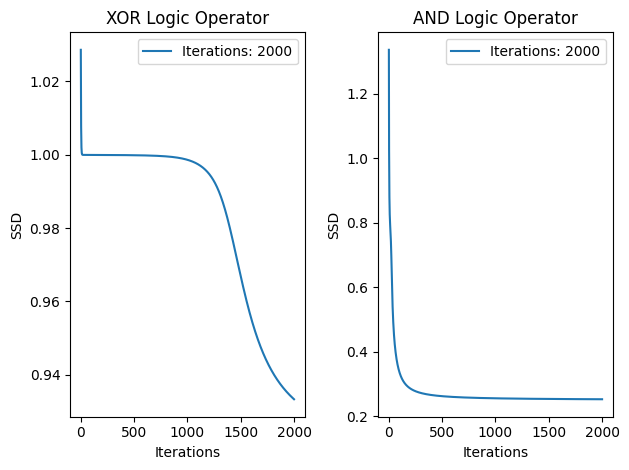

The target values of XOR  are: [[0]
 [1]
 [1]
 [0]]
The predicted values of XOR are: [[0.50897679]
 [0.64759115]
 [0.64759808]
 [0.65258272]]
The target values of AND operator are: [[0]
 [0]
 [0]
 [1]]
The predicted values of AND operator are: [[4.46831698e-04]
 [1.83605609e-02]
 [1.83605609e-02]
 [4.98110233e-01]]


In [6]:
#fixed iteration of 1000
class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
    self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
  def backprop(self):
# Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations = 2000
n_unit = 1

if __name__ == "__main__":

#XOR logic operator
    Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # 2 x inputs are given, x1,x2
    Target = np.array([[0],[1],[1],[0]])
    model = NeuralNetwork(Input, Target, n_unit)
    SSD = []
    for j in range(iterations):
      model.feedforward()
      model.backprop()
      errors = (Target - model.output)**2
      SSD.append(np.sum(errors)) # Objective(loss) function
    Itr = np.linspace(1,len(SSD),len(SSD))

#And operator
    Input_And = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]]) # 2 x inputs are given, x1,x2
    Target_And = np.array([[0],[0],[0],[1]])
    model_And = NeuralNetwork(Input_And, Target_And, n_unit)
    SSD_And = []
    for j in range(iterations):
      model_And.feedforward()
      model_And.backprop()
      errors_And = (Target_And - model_And.output)**2
      SSD_And.append(np.sum(errors_And)) # Objective(loss) function
    Itr_And = np.linspace(1,len(SSD_And),len(SSD_And))

plt.subplot(1, 2, 1)
plt.plot(Itr, SSD, label=f"Iterations: {iterations}")
plt.xlabel('Iterations')
plt.ylabel('SSD')
plt.title("XOR Logic Operator")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Itr_And, SSD_And, label=f"Iterations: {iterations}")
plt.xlabel('Iterations')
plt.ylabel('SSD')
plt.title("AND Logic Operator")
plt.legend()

plt.tight_layout()
plt.show()

print("The target values of XOR  are:", Target)
print("The predicted values of XOR are:", model.output)

print("The target values of AND operator are:", Target_And)
print("The predicted values of AND operator are:", model_And.output)


In [7]:
#Loss values
print("The loss values of XOR are:", (Target-model.output))
print("The loss values of AND are:", (Target_And-model_And.output))

The loss values of XOR are: [[-0.50897679]
 [ 0.35240885]
 [ 0.35240192]
 [-0.65258272]]
The loss values of AND are: [[-4.46831698e-04]
 [-1.83605609e-02]
 [-1.83605609e-02]
 [ 5.01889767e-01]]


XOR operator return 1 if the number of 1 inputs is odd, returns 0 if number of 1 inputs is even

AND operator returns 1 if both the inputs are are 1 else 0

Based on the predicted values above we see XOR operator predicted [[0.50081153]
 [0.50090882]
 [0.50085393]
 [0.500945  ]] we see that all the inputs have same predicted values close to 0.5 which indicates that the XOR model has not effectively learned with the given training parameters and the loss is relatively high.

 Where as in AND operator predicted values are [[4.50967218e-04]
 [1.83287546e-02]
 [1.83287546e-02]
 [4.98118934e-01]] the predicted values are closer to the target values. This shows that the neural network has learned the AND function more effectively. The loss values are relatively low.

 The loss values of AND operator are closer to 0 than XOR loss values. This showes that AND operator model has learned more effectively.

The loss values of XOR are: 2 [[-0.02090145]
 [ 0.0200065 ]
 [ 0.5008176 ]
 [-0.50075069]]
The loss values of AND are: 2 [[-0.00052806]
 [-0.01178364]
 [-0.01156417]
 [ 0.02015641]]
The loss values of XOR are: 5 [[-0.01736643]
 [ 0.01319051]
 [ 0.01950834]
 [-0.01718519]]
The loss values of AND are: 5 [[-0.0002538 ]
 [-0.010699  ]
 [-0.0104023 ]
 [ 0.01497166]]
The loss values of XOR are: 10 [[-0.01734992]
 [ 0.01638798]
 [ 0.01649151]
 [-0.01759782]]
The loss values of AND are: 10 [[-2.73187946e-05]
 [-9.29104249e-03]
 [-9.48577258e-03]
 [ 1.27420347e-02]]
The loss values of XOR are: 50 [[-9.99999204e-01]
 [ 8.21578382e-08]
 [ 8.79081410e-08]
 [-9.99999985e-01]]
The loss values of AND are: 50 [[-9.99994655e-01]
 [-9.99999235e-01]
 [-9.99999544e-01]
 [ 9.95129125e-08]]


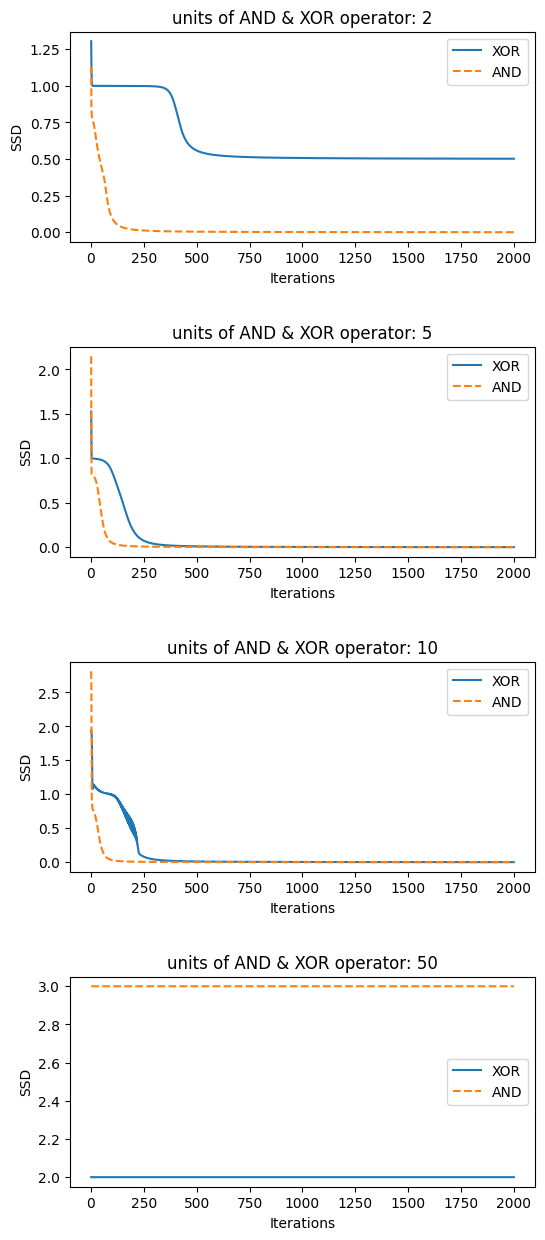

In [8]:
#Increase the number of neurons in the hidden layer (n_unit) to 2, 5, 10, 50.

#fixed iteration of 1000
class NeuralNetwork:
  def __init__(self, x, y, N):
    self.input = x
    self.neuron = N
    self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
    self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
    self.y = y
    self.output = np.zeros(self.y.shape) # instantiating the output
  def feedforward(self):
    self.layer1 = sigmoid(np.dot(self.input, self.weights1))  # h =x1*w1^1+x2*w2^^1+x3*w3^1
    self.output = sigmoid(np.dot(self.layer1, self.weights2)) # ypred =h1*w1^2+h2*w2^2+h3*w3^2
  def backprop(self):
# Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T,(2*(self.y - self.output)* sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,(np.dot(2*(self.y - self.output)* sigmoid_derivative(self.output),self.weights2.T) * sigmoid_derivative(self.layer1)))
    # weights updating
    self.weights1 += d_weights1
    self.weights2 += d_weights2
iterations = 2000
n_unit_values = [2,5,10,50]
# Create a grid of subplots
fig, axs = plt.subplots(len(n_unit_values), 1, figsize=(6, 15))

if __name__ == "__main__":
  for i,n_unit in enumerate(n_unit_values):

  #XOR logic operator
      Input = np.array([[0,0,1],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1]]) # 2 x inputs are given, x1,x2
      Target = np.array([[0],[1],[1],[0]])
      model = NeuralNetwork(Input, Target, n_unit)
      SSD = []
      for j in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors)) # Objective(loss) function
      Itr = np.linspace(1,len(SSD),len(SSD))

  #And operator
      Input_And = np.array([[0,0,1],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1]]) # 2 x inputs are given, x1,x2
      Target_And = np.array([[0],[0],[0],[1]])
      model_And = NeuralNetwork(Input_And, Target_And, n_unit)
      SSD_And = []
      for j in range(iterations):
        model_And.feedforward()
        model_And.backprop()
        errors_And = (Target_And - model_And.output)**2
        SSD_And.append(np.sum(errors_And)) # Objective(loss) function
      Itr_And = np.linspace(1,len(SSD_And),len(SSD_And))


      axs[i].plot(Itr, SSD, label=f"XOR")
      axs[i].plot(Itr_And, SSD_And, linestyle='--', label=f"AND")
      axs[i].set_xlabel('Iterations')
      axs[i].set_ylabel('SSD')
      axs[i].set_title(f"units of AND & XOR operator: {n_unit}")
      axs[i].legend()
      #Loss values
      print(f"The loss values of XOR are: {n_unit}", (Target-model.output))
      print(f"The loss values of AND are: {n_unit}", (Target_And-model_And.output))
plt.subplots_adjust(hspace=0.5)



The AND operator is simple and can learn effectively for single hidden layers.In this scinareo as the units were increasing the AND operator was stable.
XOR is more complex function and hence increasing the units makes the XOR perform better than AND operator, but after few iterations the neural network is overfitting the data, that is it is adding noise in the data.
For 50 units both XOR and AND had less loss values

Adding the learning parameter

In [9]:
#using tensorflow

#Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 1
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer = SGD(learning_rate = 0.01),
metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 2000, verbose=0)
print("The predicted class labels are:", model.predict(Input))
print("loss values:", (Target-model.predict(Input)))

1/1 [==============================] - 0s 79ms/step
The predicted class labels are: [[0.5510703]
 [0.55071  ]
 [0.5507495]
 [0.3204809]]
1/1 [==============================] - 0s 21ms/step
loss values: [[-0.5510703 ]
 [ 0.44928998]
 [ 0.44925052]
 [-0.3204809 ]]


Task 3

In [10]:
#change the parameter “n_unit” as 1, 10
#using tensorflow

#Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 10
model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer = SGD(learning_rate = 0.01),
metrics=['binary_accuracy'])
model.fit(Input, Target, epochs = 2000, verbose=0)
print("The predicted class labels are:", model.predict(Input))
print("loss values:", (Target-model.predict(Input)))

1/1 [==============================] - 0s 52ms/step
The predicted class labels are: [[0.4230309 ]
 [0.537901  ]
 [0.6172987 ]
 [0.44793072]]
1/1 [==============================] - 0s 20ms/step
loss values: [[-0.4230309 ]
 [ 0.46209902]
 [ 0.38270128]
 [-0.44793072]]


The model confidence level in predicting the classes is more at 10 units than in 1 unit.The predicted values are closer to 0.5 for most of the classes that indicate moderate level of confidence in classification

**Multilayer Perceptron for Image Classification**